<a href="https://colab.research.google.com/github/yanxiaoqi932/Machine-Learning/blob/main/%E2%80%9CGym_Envs_1_preamble_evn_list_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook presents the preambles needed for working with Gym at Google CoLab and Gym Environments. 

> A [second python notebook](https://colab.research.google.com/drive/1tug_bpg8RwrFOI8C6Ed-zo0OgD3yfnWy) shows how to solve some tasks with random action, assigned deterministic action, or heuristic action and how to render the process of tasks to video. 

> A [third python notebook](https://colab.research.google.com/drive/1C5iArMcVaiIwGatAj2utZAMHVtEmLLfw) explores more complex policy using existing functions. 

Later, I will show how to craft your own RL algorithms from scratch in a seperate installment of python notebooks. 

# CoLab Preambles

Most of the requirements of python packages are already fulfilled on CoLab. To run Gym, you have to install prerequisites like xvbf,opengl & other python-dev packages using the following codes.

[](To be done next time: )
[](https://becominghuman.ai/lets-build-an-atari-ai-part-1-dqn-df57e8ff3b26)

In [1]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (593 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 784 kB of 

In [ ]:
!pip install gym[atari]

For rendering environment, you can use pyvirtualdisplay. So fulfill that 

In [2]:
!pip install pyvirtualdisplay
!pip install piglet

     |████████████████████████████████| 67 kB 2.9 MB/s 


To activate virtual display we need to run a script once for training an agent, as follows:

In [3]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [4]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [6]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
import torch
from IPython.display import HTML

from IPython import display as ipythondisplay

In [7]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

# OpenAI Gym Available Environment

Gym comes with a diverse suite of environments that range from easy to difficult and involve many different kinds of data. View the [full list of environments](https://gym.openai.com/envs) to get the birds-eye view.

- [Classic control](https://gym.openai.com/envs#classic_control) and [toy text](https://gym.openai.com/envs#toy_text): complete small-scale tasks, mostly from the RL literature. They’re here to get you started.

- [Algorithmic](https://gym.openai.com/envs#algorithmic): perform computations such as adding multi-digit numbers and reversing sequences. One might object that these tasks are easy for a computer. The challenge is to learn these algorithms purely from examples. These tasks have the nice property that it’s easy to vary the difficulty by varying the sequence length.

- [Atari](https://gym.openai.com/envs#atari): play classic Atari games. 

- [2D and 3D robots](https://gym.openai.com/envs#mujoco): control a robot in simulation. These tasks use the MuJoCo physics engine, which was designed for fast and accurate robot simulation. 


##  List the Environments Available in your Installation

gym’s main purpose is to provide a large collection of environments that expose a common interface and are versioned to allow for comparisons. 

In [8]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

## Add your own environments


In [ ]:
# to be completed
gym.make()
register()

TypeError: ignored

## Algorithmic

These are a variety of algorithmic tasks, such as learning to copy a sequence.

In [ ]:
env = gym.make('Copy-v0')
env.reset()
#plt.imshow(env.render())
env.render()

Total length of input instance: 3, step: 0
Observation Tape    :   EBC  
Output Tape         :   
Targets             :   EBC  








## Atari

The Atari environments are a variety of Atari video games. Gym is already installed but not with atari game environments, to get that:

In [9]:
!pip install gym[atari]

In [10]:
!python -m atari_py.import_roms /content/ROMS

In [13]:
!python -m atari_py.import_roms /content/ROMS

copying defender.bin from /content/ROMS/Defender (1982) (Atari, Robert C. Polaro, Alan J. Murphy - Sears) (CX2609 - 49-75186) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/defender.bin
copying berzerk.bin from /content/ROMS/Berzerk (1982) (Atari, Dan Hitchens - Sears) (CX2650 - 49-75168) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/berzerk.bin
copying asteroids.bin from /content/ROMS/Asteroids (1981) (Atari, Brad Stewart - Sears) (CX2649 - 49-75163) [no copyright] ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/asteroids.bin
copying jamesbond.bin from /content/ROMS/James Bond 007 (James Bond Agent 007) (1984) (Parker Brothers - On-Time Software, Joe Gaucher, Louis Marbel) (PB5110) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/jamesbond.bin
copying gopher.bin from /content/ROMS/Gopher (Gopher Attack) (1982) (U.S. Games Corporation - JWDA, Sylvia Day, Todd Marshall, Robin McDaniel, Henry Will IV) (VC20

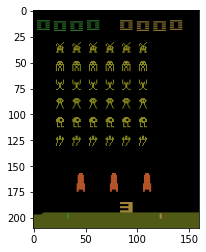

In [14]:
# Atari Environment
env = gym.make('SpaceInvaders-v0')
env.reset()
plt.imshow(env.render('rgb_array'))

## Box2d

Box2d is a 2D physics engine. You can install it via  and then get started as follow:

In [ ]:
!pip install gym[box2d]

    100% |████████████████████████████████| 450kB 7.0MB/s 


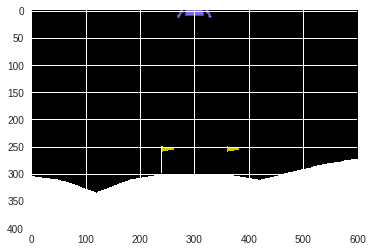

In [ ]:
# Box2d Environment
env = gym.make('LunarLander-v2')
env.reset()
plt.imshow(env.render('rgb_array'))
#env.render()

## Classic control
These are a variety of classic control tasks, which would appear in a typical reinforcement learning textbook. If you didn't do the full install, you will need to run the following code to enable rendering. 

In [ ]:
!pip install gym[classic_control]

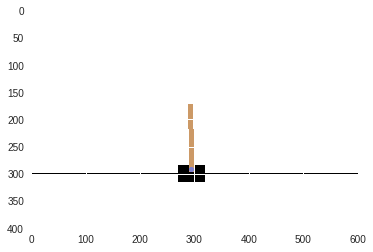

In [ ]:
env = gym.make('CartPole-v0')
env.reset()
plt.imshow(env.render('rgb_array'))
#env.render()

# I did not test the following two environments because of the MuJoCo License. 

## MuJoCo

MuJoCo is a physics engine which can do very detailed efficient simulations with contacts. It's not open-source, so you'll have to follow the instructions in mujoco-py to set it up. 

In [ ]:
!pip install gym[mujoco]

In [ ]:
env = gym.make('Humanoid-v2')
env.reset()
plt.imshow(env.render('rgb_array'))
#env.render()

## Robotics
MuJoCo is a physics engine which can do very detailed efficient simulations with contacts and we use it for all robotics environments. It's not open-source, so you'll have to follow the instructions in mujoco-py to set it up. 

In [ ]:
!pip install gym[robotics]

In [ ]:
env = gym.make('HandManipulateBlock-v0')
env.reset()
plt.imshow(env.render('rgb_array'))
#env.render()